## 전처리

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
plt.rc('font', family='nanum')
sns.set(font="AppleGothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, 
        style='darkgrid') 

In [3]:
_2017 = pd.read_csv('test2017.csv',sep =',')
_2018 = pd.read_csv('test2018.csv',sep =',')
_2019 = pd.read_csv('test2019.csv',sep =',')
_2020 = pd.read_csv('test2020.csv',sep =',')
_2021 = pd.read_csv('test2021.csv',sep =',')

In [4]:
train = pd.concat([_2017,_2018,_2019,_2020,_2021])
train = train.reset_index()

## EDA

In [5]:
train['기준일'] = pd.to_datetime(train['기준일ID'],format ='%Y%m%d')

In [6]:
train['월'] = train['기준일'].dt.month
train['일'] = train['기준일'].dt.day
train['요일'] = train['기준일'].dt.dayofweek
train['년도'] = train['기준일'].dt.year

'''
0: 월
1: 화
2: 수
3: 목
4: 금
5: 토
6: 일

'''
train['년도']=train['년도'].replace(2017,0)
train['년도']=train['년도'].replace(2018,1)
train['년도']=train['년도'].replace(2019,2)
train['년도']=train['년도'].replace(2020,3)
train['년도']=train['년도'].replace(2021,4)

In [7]:
holiday = [20170101,20170127,20170128,20170129,20170301,20170503,
          20170505,20170509,20170606,20170815,20171003,20171004,
          20171005,20171009,20171225,
          20180101,20180215,20180216,20180217,20180301,20180505,
          20180522,20180606,20180815,20180923,20180924,20180925,
          20181003,20181009,20181225,
          20190101,20190204,20190205,20190206,20190301,20190505,
          20190512,20190606,20190815,20190912,20190913,20190914,
          20191003,20191009,20191225,
          20200101,20200124,20200125,20200126,20200301,20200415,
          20200430,20200505,20200606,20200815,20200930,20201001,
          20201002,20201003,20201009,20201225,
          20210101,20210211,20210212,20210213,20210301,20210505,
          20210519,20210606,20210815,20210920,20210921,20210922,
          20211003,20211009,2021225,
          20220101,20220131,20220201,20220202
          ]
lunar_new_year = [
    #20170127,20170128,20170129,
    20180215,20180216,20180217,
    20190204,20190205,20190206,
    20200124,20200125,20200126,
    20210211,20210212,20210213,
    20220131,20220201,20220202
]

special_holiday = [
    20170127,20170128,20170129,
    20180215,20180216,20180217,
    20190204,20190205,20190206,
    20200124,20200125,20200126,
    20210211,20210212,20210213,
    20220131,20220201,20220202,
    
    20171003,20171004,20171005,
    20180923,20180924,20180925,
    20190912,20190913,20190914,
    20200930,20201001,20201002,20201003,
    20210920,20210921,20210922,
]

In [8]:
train['holiday'] = 0
train['lunar_new_year'] = 0
train['special_holiday'] = 0
train = train.reset_index()

In [9]:
for i in range(0,len(train)):
    if train['기준일ID'][i] in holiday:
        train['holiday'][i] = 1
    if train['기준일ID'][i] in special_holiday:
        train['special_holiday'][i] = 1 
    if train['기준일ID'][i] in lunar_new_year:
        train['lunar_new_year'][i] = 1 

/var/folders/6p/0pc1cspn3dl3k_3fbg4sjbyh0000gn/T/ipykernel_8391/3270782768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['holiday'][i] = 1
/var/folders/6p/0pc1cspn3dl3k_3fbg4sjbyh0000gn/T/ipykernel_8391/3270782768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['special_holiday'][i] = 1
/var/folders/6p/0pc1cspn3dl3k_3fbg4sjbyh0000gn/T/ipykernel_8391/3270782768.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr

In [10]:
train = train.drop(['Unnamed: 0'],axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43512 entries, 0 to 43511
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   level_0          43512 non-null  int64         
 1   index            43512 non-null  int64         
 2   기준일ID            43512 non-null  int64         
 3   시간대구분            43512 non-null  int64         
 4   총생활인구수           43512 non-null  float64       
 5   남자0세부터9세생활인구수    43512 non-null  float64       
 6   남자10세부터14세생활인구수  43512 non-null  float64       
 7   남자15세부터19세생활인구수  43512 non-null  float64       
 8   남자20세부터24세생활인구수  43512 non-null  float64       
 9   남자25세부터29세생활인구수  43512 non-null  float64       
 10  남자30세부터34세생활인구수  43512 non-null  float64       
 11  남자35세부터39세생활인구수  43512 non-null  float64       
 12  남자40세부터44세생활인구수  43512 non-null  float64       
 13  남자45세부터49세생활인구수  43512 non-null  float64       
 14  남자50세부터54세생활인구수  43512 non-null  float

In [12]:
plt.figure(figsize=(300,100))
plt.plot(train['기준일'],train['총생활인구수'])

In [13]:
test = pd.read_csv('sample_submission.csv',sep =',')
test = test.drop(['id','count'],axis =1)

In [14]:
test[['시간대구분','요일','월','holiday','lunar_new_year','special_holiday','년도']]=0
test['년도'] = 5
time = 0
day = 6

test['월'].iloc[0:744] = 1
test['월'].iloc[744:] = 2
test['holiday'].iloc[0:24] = 1
test['holiday'].iloc[720:792] = 1
test['special_holiday'].iloc[720:792] = 1
test['lunar_new_year'].iloc[720:792] = 1
for i in range(0,len(test)):
    if time > 23:
        time = 0
        day+=1
    if day > 6:
        day = 0
    test['시간대구분'][i] = time
    test['요일'][i] = day
    time+=1

### 각 연도별의 월별 차이가 있을까?

In [15]:
import scipy
import scipy.stats as stats


In [16]:
_2017 = train.loc[train['년도']==0]
_2018 = train.loc[train['년도']==1]
_2019 = train.loc[train['년도']==2]
_2020 = train.loc[train['년도']==3]
_2021 = train.loc[train['년도']==4]

In [17]:
#2017년도
pd.options.display.float_format = '{:.5f}'.format

F_stats, pVal = stats.f_oneway(_2017.loc[_2017['월']==1]['총생활인구수'],_2017.loc[_2017['월']==2]['총생활인구수'],
                              _2017.loc[_2017['월']==3]['총생활인구수'],_2017.loc[_2017['월']==4]['총생활인구수'],
                              _2017.loc[_2017['월']==5]['총생활인구수'],_2017.loc[_2017['월']==6]['총생활인구수'],
                              _2017.loc[_2017['월']==7]['총생활인구수'],_2017.loc[_2017['월']==8]['총생활인구수'],
                              _2017.loc[_2017['월']==9]['총생활인구수'],_2017.loc[_2017['월']==10]['총생활인구수'],
                              _2017.loc[_2017['월']==11]['총생활인구수'],_2017.loc[_2017['월']==12]['총생활인구수'])


print(F_stats, pVal)

112.13574400082781 1.0257333812501765e-240


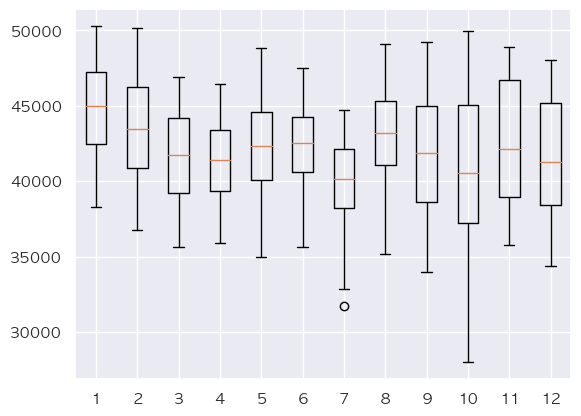

In [18]:
plot_data = [_2017.loc[_2017['월']==1]['총생활인구수'],_2017.loc[_2017['월']==2]['총생활인구수'],
                              _2017.loc[_2017['월']==3]['총생활인구수'],_2017.loc[_2017['월']==4]['총생활인구수'],
                              _2017.loc[_2017['월']==5]['총생활인구수'],_2017.loc[_2017['월']==6]['총생활인구수'],
                              _2017.loc[_2017['월']==7]['총생활인구수'],_2017.loc[_2017['월']==8]['총생활인구수'],
                              _2017.loc[_2017['월']==9]['총생활인구수'],_2017.loc[_2017['월']==10]['총생활인구수'],
                              _2017.loc[_2017['월']==11]['총생활인구수'],_2017.loc[_2017['월']==12]['총생활인구수']]
ax = plt.boxplot(plot_data)
plt.show()

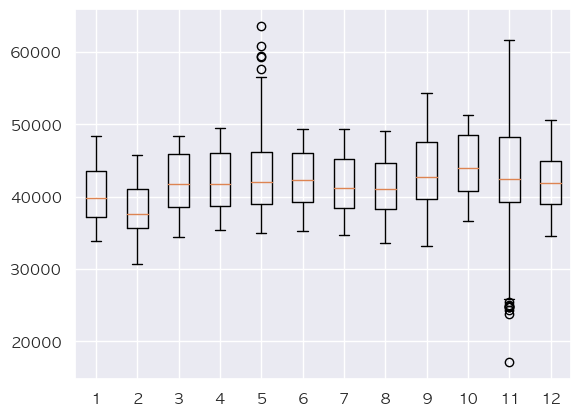

In [19]:
plot_data = [_2018.loc[_2018['월']==1]['총생활인구수'],_2018.loc[_2018['월']==2]['총생활인구수'],
                              _2018.loc[_2018['월']==3]['총생활인구수'],_2018.loc[_2018['월']==4]['총생활인구수'],
                              _2018.loc[_2018['월']==5]['총생활인구수'],_2018.loc[_2018['월']==6]['총생활인구수'],
                              _2018.loc[_2018['월']==7]['총생활인구수'],_2018.loc[_2018['월']==8]['총생활인구수'],
                              _2018.loc[_2018['월']==9]['총생활인구수'],_2018.loc[_2018['월']==10]['총생활인구수'],
                              _2018.loc[_2018['월']==11]['총생활인구수'],_2018.loc[_2018['월']==12]['총생활인구수']]
ax = plt.boxplot(plot_data)
plt.show()

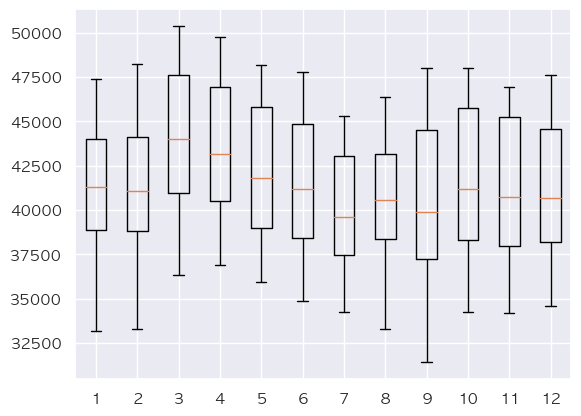

In [20]:
plot_data = [_2019.loc[_2019['월']==1]['총생활인구수'],_2019.loc[_2019['월']==2]['총생활인구수'],
                              _2019.loc[_2019['월']==3]['총생활인구수'],_2019.loc[_2019['월']==4]['총생활인구수'],
                              _2019.loc[_2019['월']==5]['총생활인구수'],_2019.loc[_2019['월']==6]['총생활인구수'],
                              _2019.loc[_2019['월']==7]['총생활인구수'],_2019.loc[_2019['월']==8]['총생활인구수'],
                              _2019.loc[_2019['월']==9]['총생활인구수'],_2019.loc[_2019['월']==10]['총생활인구수'],
                              _2019.loc[_2019['월']==11]['총생활인구수'],_2019.loc[_2019['월']==12]['총생활인구수']]
ax = plt.boxplot(plot_data)
plt.show()

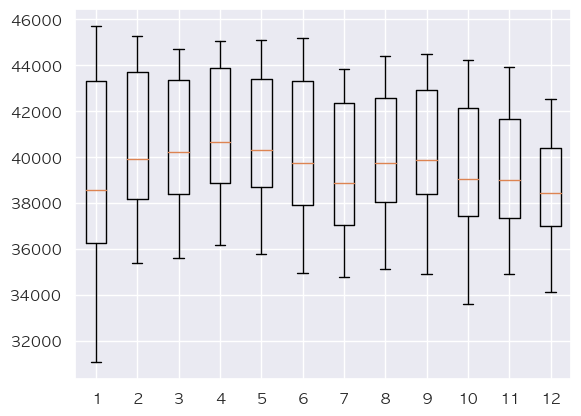

In [21]:
plot_data = [_2020.loc[_2020['월']==1]['총생활인구수'],_2020.loc[_2020['월']==2]['총생활인구수'],
                              _2020.loc[_2020['월']==3]['총생활인구수'],_2020.loc[_2020['월']==4]['총생활인구수'],
                              _2020.loc[_2020['월']==5]['총생활인구수'],_2020.loc[_2020['월']==6]['총생활인구수'],
                              _2020.loc[_2020['월']==7]['총생활인구수'],_2020.loc[_2020['월']==8]['총생활인구수'],
                              _2020.loc[_2020['월']==9]['총생활인구수'],_2020.loc[_2020['월']==10]['총생활인구수'],
                              _2020.loc[_2020['월']==11]['총생활인구수'],_2020.loc[_2020['월']==12]['총생활인구수']]
ax = plt.boxplot(plot_data)
plt.show()

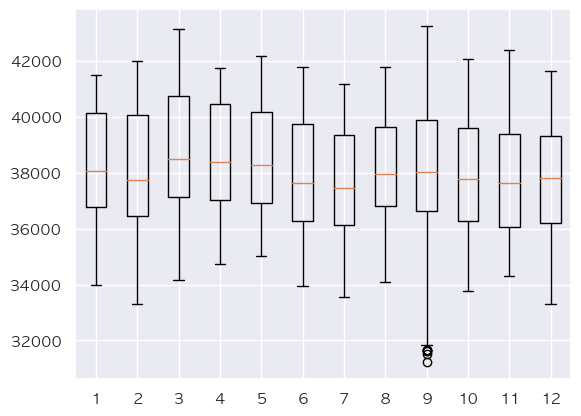

In [22]:
plot_data = [_2021.loc[_2021['월']==1]['총생활인구수'],_2021.loc[_2021['월']==2]['총생활인구수'],
                              _2021.loc[_2021['월']==3]['총생활인구수'],_2021.loc[_2021['월']==4]['총생활인구수'],
                              _2021.loc[_2021['월']==5]['총생활인구수'],_2021.loc[_2021['월']==6]['총생활인구수'],
                              _2021.loc[_2021['월']==7]['총생활인구수'],_2021.loc[_2021['월']==8]['총생활인구수'],
                              _2021.loc[_2021['월']==9]['총생활인구수'],_2021.loc[_2021['월']==10]['총생활인구수'],
                              _2021.loc[_2021['월']==11]['총생활인구수'],_2021.loc[_2021['월']==12]['총생활인구수']]
ax = plt.boxplot(plot_data)
plt.show()

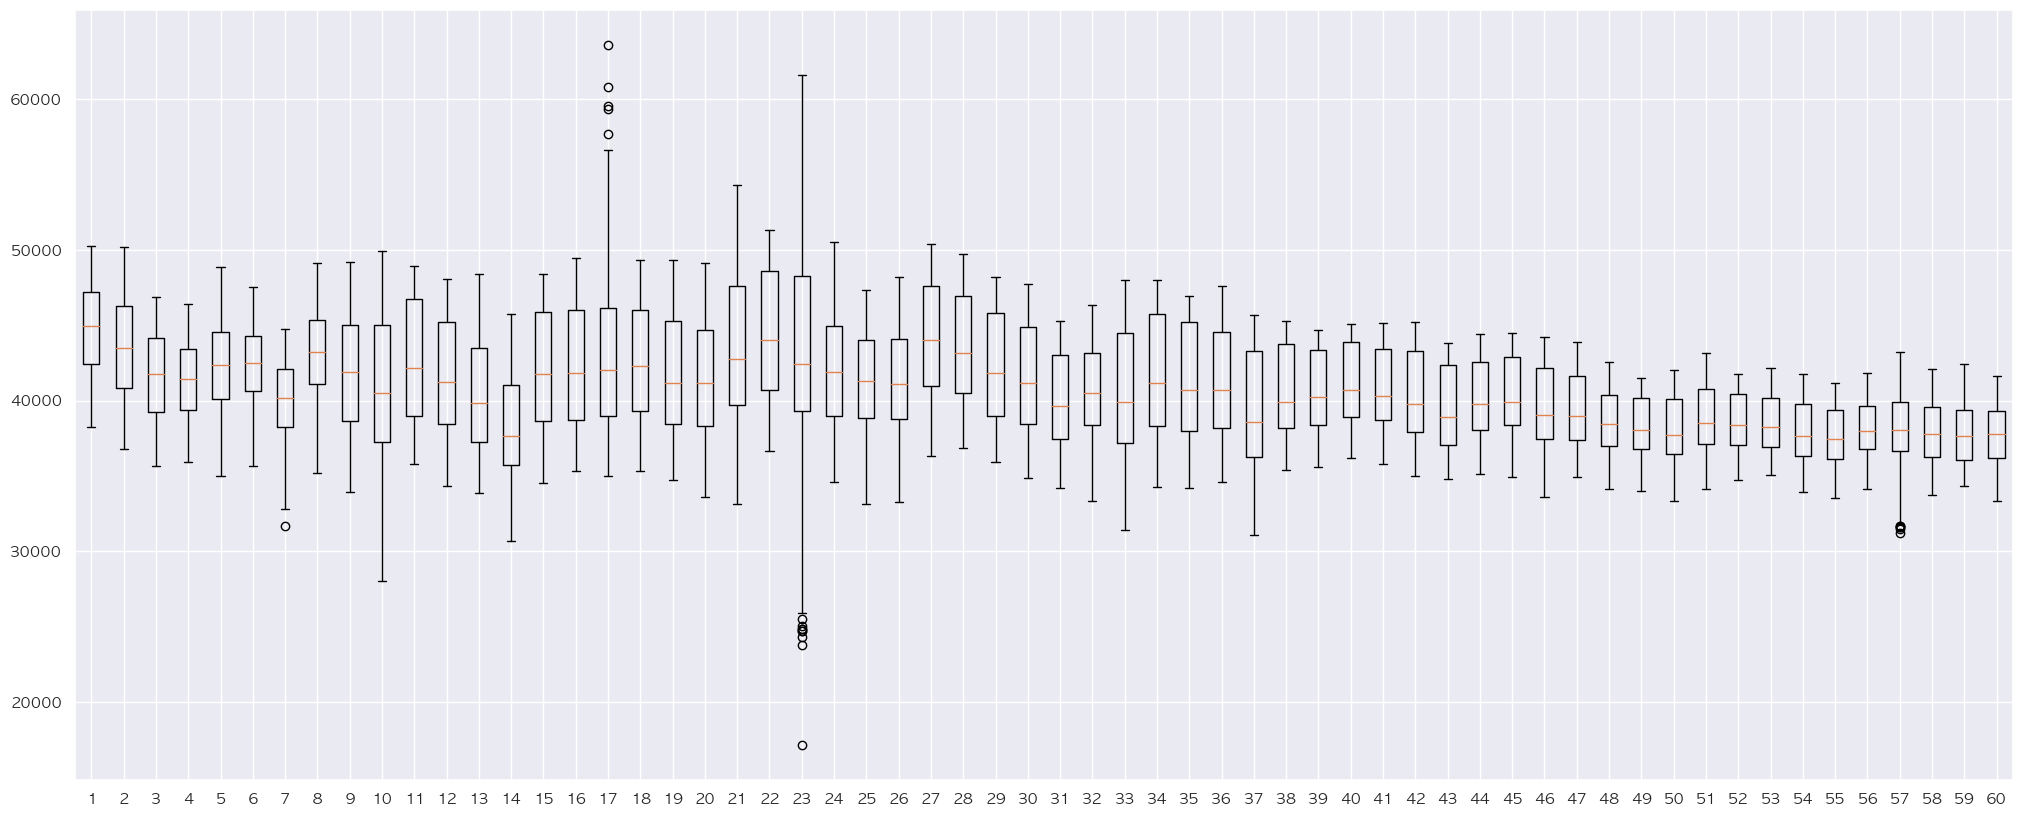

In [23]:
plt.figure(figsize=(25,10))
plot_data = [_2017.loc[_2017['월']==1]['총생활인구수'],_2017.loc[_2017['월']==2]['총생활인구수'],
                              _2017.loc[_2017['월']==3]['총생활인구수'],_2017.loc[_2017['월']==4]['총생활인구수'],
                              _2017.loc[_2017['월']==5]['총생활인구수'],_2017.loc[_2017['월']==6]['총생활인구수'],
                              _2017.loc[_2017['월']==7]['총생활인구수'],_2017.loc[_2017['월']==8]['총생활인구수'],
                              _2017.loc[_2017['월']==9]['총생활인구수'],_2017.loc[_2017['월']==10]['총생활인구수'],
                              _2017.loc[_2017['월']==11]['총생활인구수'],_2017.loc[_2017['월']==12]['총생활인구수'],
             _2018.loc[_2018['월']==1]['총생활인구수'],_2018.loc[_2018['월']==2]['총생활인구수'],
                              _2018.loc[_2018['월']==3]['총생활인구수'],_2018.loc[_2018['월']==4]['총생활인구수'],
                              _2018.loc[_2018['월']==5]['총생활인구수'],_2018.loc[_2018['월']==6]['총생활인구수'],
                              _2018.loc[_2018['월']==7]['총생활인구수'],_2018.loc[_2018['월']==8]['총생활인구수'],
                              _2018.loc[_2018['월']==9]['총생활인구수'],_2018.loc[_2018['월']==10]['총생활인구수'],
                              _2018.loc[_2018['월']==11]['총생활인구수'],_2018.loc[_2018['월']==12]['총생활인구수'],
             _2019.loc[_2019['월']==1]['총생활인구수'],_2019.loc[_2019['월']==2]['총생활인구수'],
                              _2019.loc[_2019['월']==3]['총생활인구수'],_2019.loc[_2019['월']==4]['총생활인구수'],
                              _2019.loc[_2019['월']==5]['총생활인구수'],_2019.loc[_2019['월']==6]['총생활인구수'],
                              _2019.loc[_2019['월']==7]['총생활인구수'],_2019.loc[_2019['월']==8]['총생활인구수'],
                              _2019.loc[_2019['월']==9]['총생활인구수'],_2019.loc[_2019['월']==10]['총생활인구수'],
                              _2019.loc[_2019['월']==11]['총생활인구수'],_2019.loc[_2019['월']==12]['총생활인구수'],
             _2020.loc[_2020['월']==1]['총생활인구수'],_2020.loc[_2020['월']==2]['총생활인구수'],
                              _2020.loc[_2020['월']==3]['총생활인구수'],_2020.loc[_2020['월']==4]['총생활인구수'],
                              _2020.loc[_2020['월']==5]['총생활인구수'],_2020.loc[_2020['월']==6]['총생활인구수'],
                              _2020.loc[_2020['월']==7]['총생활인구수'],_2020.loc[_2020['월']==8]['총생활인구수'],
                              _2020.loc[_2020['월']==9]['총생활인구수'],_2020.loc[_2020['월']==10]['총생활인구수'],
                              _2020.loc[_2020['월']==11]['총생활인구수'],_2020.loc[_2020['월']==12]['총생활인구수'],
             _2021.loc[_2021['월']==1]['총생활인구수'],_2021.loc[_2021['월']==2]['총생활인구수'],
                              _2021.loc[_2021['월']==3]['총생활인구수'],_2021.loc[_2021['월']==4]['총생활인구수'],
                              _2021.loc[_2021['월']==5]['총생활인구수'],_2021.loc[_2021['월']==6]['총생활인구수'],
                              _2021.loc[_2021['월']==7]['총생활인구수'],_2021.loc[_2021['월']==8]['총생활인구수'],
                              _2021.loc[_2021['월']==9]['총생활인구수'],_2021.loc[_2021['월']==10]['총생활인구수'],
                              _2021.loc[_2021['월']==11]['총생활인구수'],_2021.loc[_2021['월']==12]['총생활인구수']
            ]
ax = plt.boxplot(plot_data)
plt.show()

In [24]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

## SHIFTING

In [25]:
train['총생활인구수'] = train['총생활인구수'].astype('int')

In [26]:
train['1d'] = train['총생활인구수'].astype('int').shift(24)
train['7d'] = train['총생활인구수'].astype('int').shift(24*7)
train['1h'] = train['총생활인구수'].astype('int').shift(1)
train['2h'] = train['총생활인구수'].astype('int').shift(2)

In [27]:
date1 = 4
date2 = date1+59

temp1 = train['1d'][len(train)-date2*24:len(train)-date1*24].astype('int')
temp2 = train['7d'][len(train)-date2*24:len(train)-date1*24].astype('int')
temp3 = train['1h'][len(train)-date2*24:len(train)-date1*24].astype('int')
temp4 = train['2h'][len(train)-date2*24:len(train)-date1*24].astype('int')


temp1 = temp1.reset_index()
temp2 = temp2.reset_index()
temp3 = temp3.reset_index()
temp4 = temp4.reset_index()

temp1 = temp1.drop('index',axis=1)
temp2 = temp2.drop('index',axis=1)
temp3 = temp3.drop('index',axis=1)
temp4 = temp4.drop('index',axis=1)

In [28]:
len(temp1)

1416

In [29]:
test['1d'] = temp1
test['7d'] = temp2
test['1h'] = temp3
test['2h'] = temp4

## 이상치 제거

2018년도 5월의 데이터가 이상한 것을 확인할 수 있다.

자세히 살펴보니 5월 27일에서 28일로 넘어가는 새벽에 70세 이상 여성의 인구가 급격히 증가한다.

이런 이상치를 제거해줄 필요가 있어보인다.

## Rolling

In [30]:
train['rolling_3'] = train['총생활인구수'].rolling(3).var()
train['rolling_5'] = train['총생활인구수'].rolling(5).var()

In [31]:
temp1 = train['rolling_3'][len(train)-1512:len(train)-96].astype('int')
temp2 = train['rolling_5'][len(train)-1512:len(train)-96].astype('int')

temp1 = temp1.reset_index()
temp2 = temp2.reset_index()

temp1 = temp1.drop('index',axis=1)
temp2 = temp2.drop('index',axis=1)

In [32]:
test['rolling_3'] = temp1
test['rolling_5'] = temp2

In [33]:
test.head()

시간대구분  요일  월  holiday  lunar_new_year  special_holiday  년도     1d     7d  \
0      0   6  1        1               0                0   5  39944  39189   
1      1   6  1        1               0                0   5  39868  38965   
2      2   6  1        1               0                0   5  39857  38803   
3      3   6  1        1               0                0   5  39716  38634   
4      4   6  1        1               0                0   5  39708  38739   

      1h     2h  rolling_3  rolling_5  
0  39724  36629    3373450    4569702  
1  39890  39724      11297    3794264  
2  39692  39890      29973    1916931  
3  39545  39692      16626      30457  
4  39435  39545       5266      30001

### ARIMA 분석

In [34]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from pmdarima.arima import ndiffs

<Figure size 640x480 with 0 Axes>

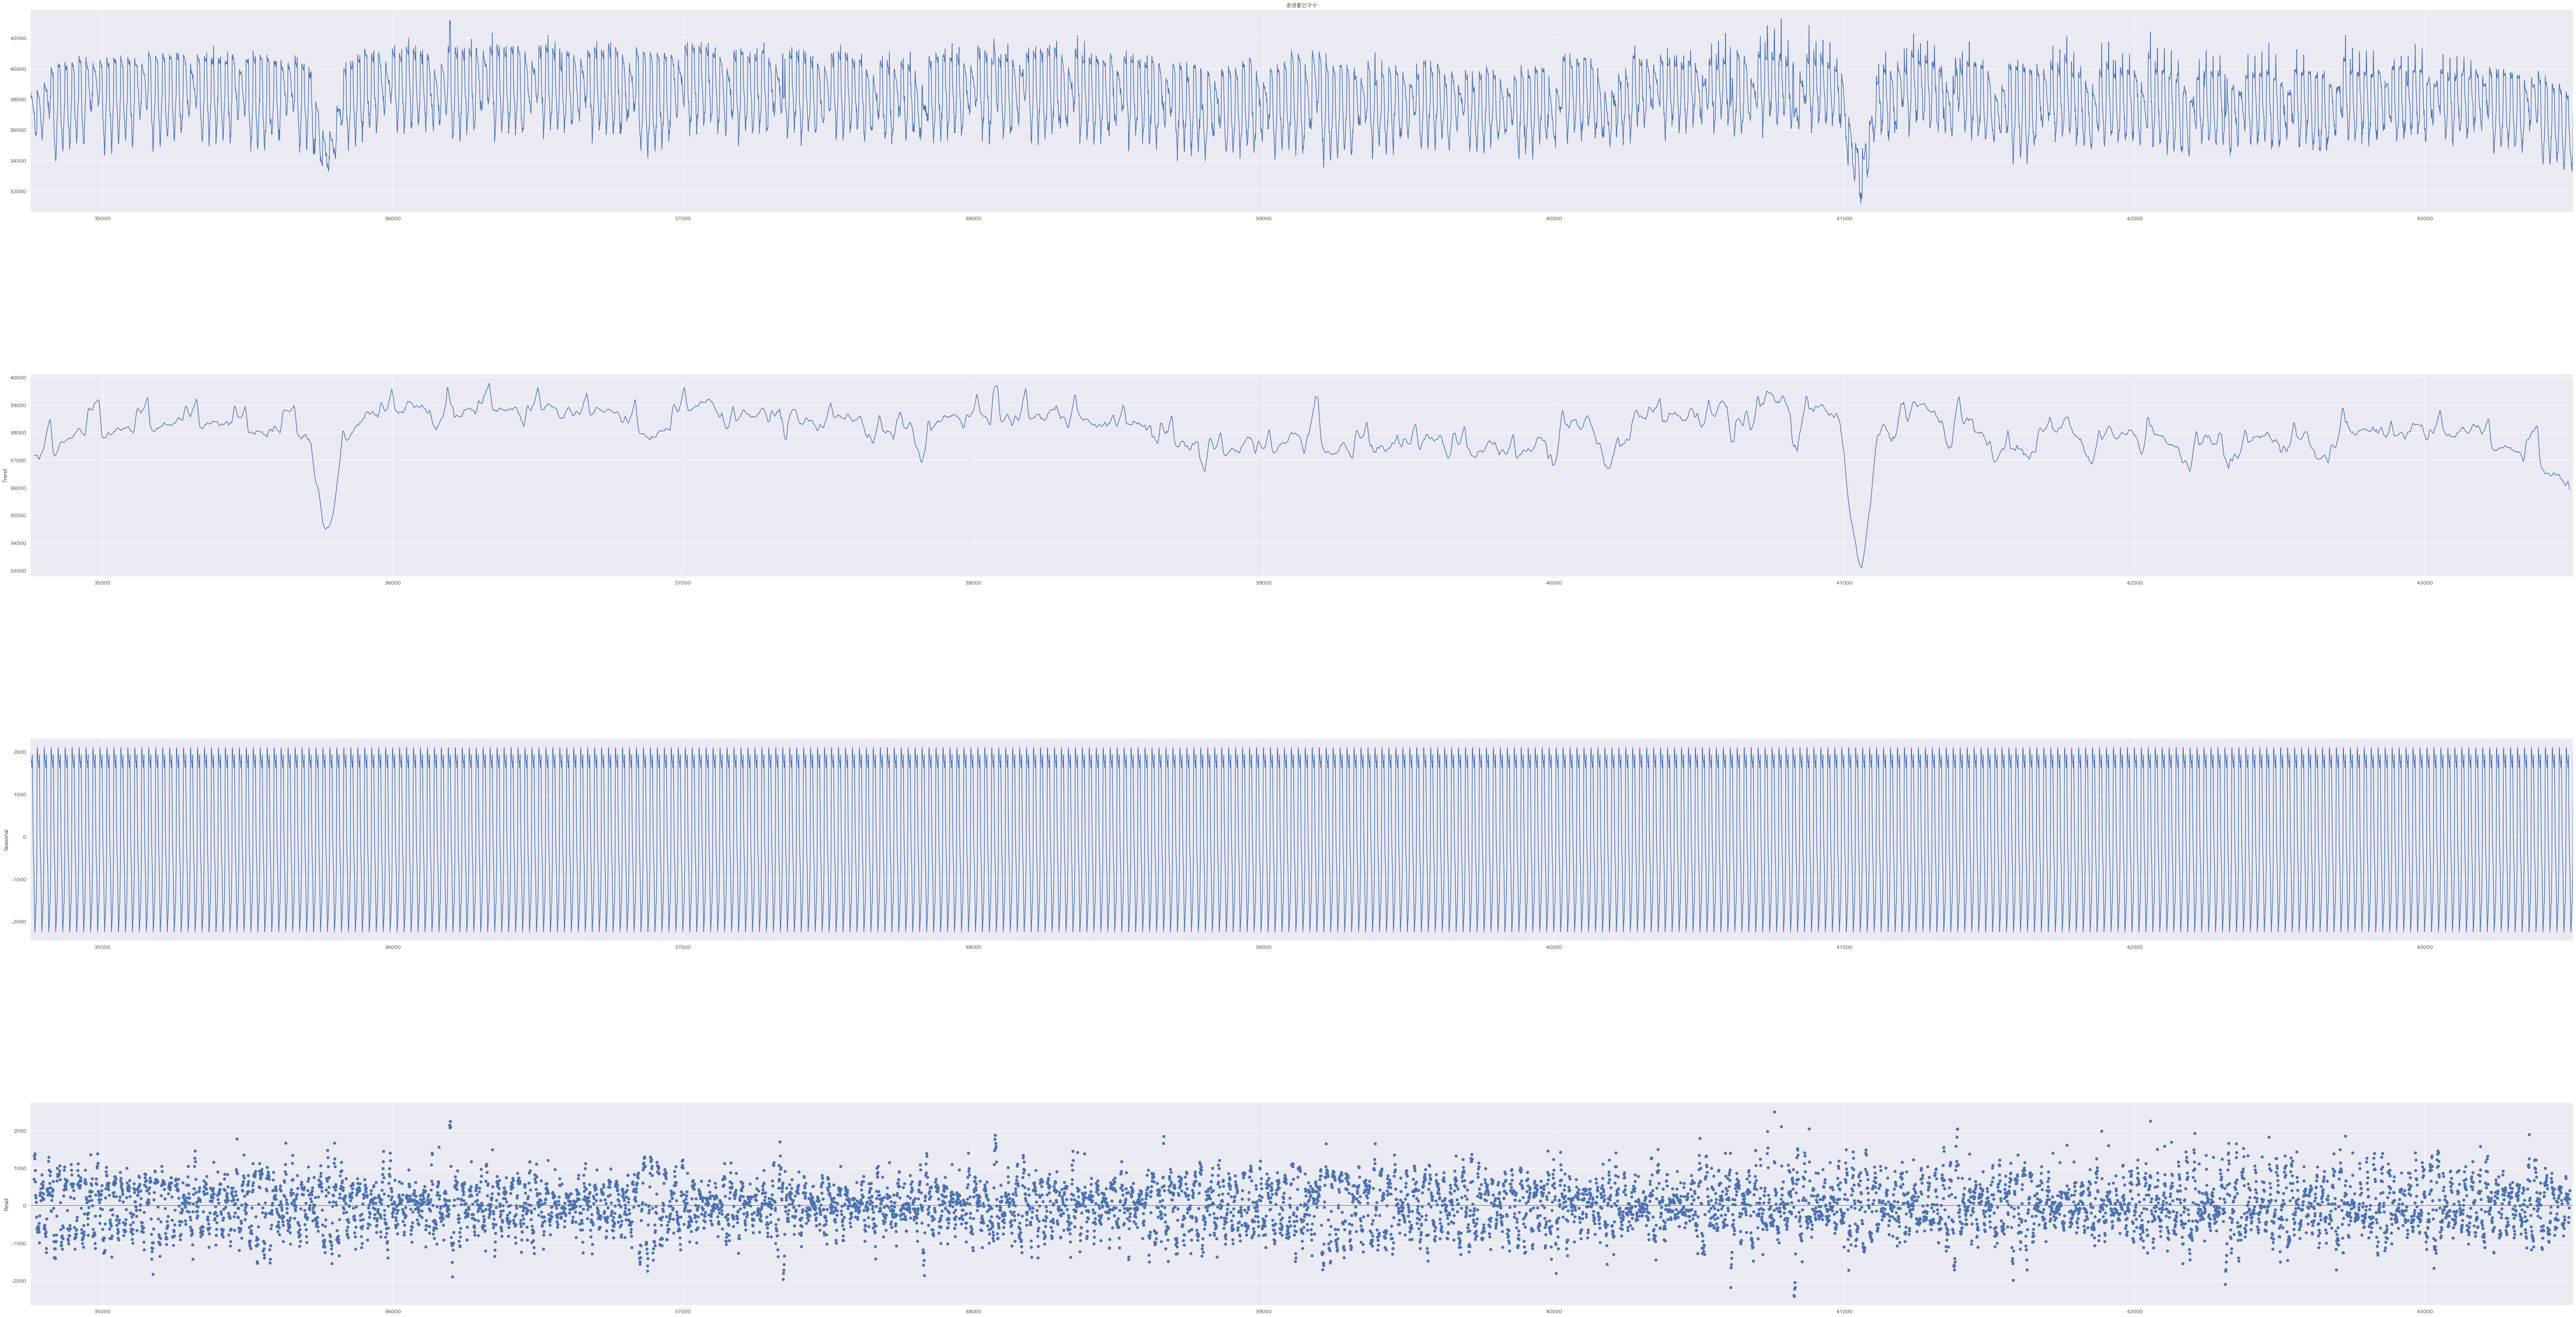

In [35]:
result = seasonal_decompose(_2021['총생활인구수'],model='additive',period = 24)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(100,50)

In [36]:
#굉장히 오래 걸립니다. 실행하기 전에 한 번 생각하는게 좋아보입니다.
'''auto_arima_model_hours = pm.auto_arima(_2021['총생활인구수'],d=1,test='adf',
                      m=24,                       
                      seasonal=True,    
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)'''

"auto_arima_model_hours = pm.auto_arima(_2021['총생활인구수'],d=1,test='adf',\n                      m=24,                       \n                      seasonal=True,    \n                      trace=True,\n                      error_action='ignore',  \n                      suppress_warnings=True, \n                      stepwise=True)"

In [37]:
'''auto_arima_model_hours.plot_diagnostics(figsize=(16, 8))
plt.show()'''

'auto_arima_model_hours.plot_diagnostics(figsize=(16, 8))\nplt.show()'

In [38]:
# 테스트 데이터 개수만큼 예측
'''predict = auto_arima_model_hours.predict(24)

fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(data = train['총생활인구수'][len(train)-1512:])
predict.plot(ax=ax, color='red')
ans.plot(ax=ax,color='blue')'''

"predict = auto_arima_model_hours.predict(24)\n\nfig, ax = plt.subplots(figsize=(15,5))\nchart = sns.lineplot(data = train['총생활인구수'][len(train)-1512:])\npredict.plot(ax=ax, color='red')\nans.plot(ax=ax,color='blue')"

# 데이터셋 만들기

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [40]:
X = train[['7d','special_holiday','1d']]#,'요일','월','holiday','special_holiday','lunar_new_year'
target = train['총생활인구수']
x_train, x_valid, y_train, y_valid = train_test_split(X, target, test_size=0.2, shuffle=False)

# 학습: Catboost

In [41]:
import catboost as cb

cat_features=['special_holiday',]#['시간대구분','월','요일','holiday','년도']#,'월','요일','holiday'
train_dataset=cb.Pool(data=x_train,label=y_train,cat_features = cat_features)
valid_dataset=cb.Pool(data=x_valid,label=y_valid,cat_features = cat_features)
test_set = cb.Pool(data=test,cat_features=cat_features)

model_cb = cb.CatBoostRegressor(iterations=2000,learning_rate=0.03,loss_function='RMSE',one_hot_max_size = 1,
                             l2_leaf_reg=0.2,metric_period = 500,depth=3,cat_features = cat_features,has_time = True)

model_cb.fit(X,target,eval_set = valid_dataset)

0:	learn: 3630.0561221	test: 3208.2725626	best: 3208.2725626 (0)	total: 61.8ms	remaining: 2m 3s
500:	learn: 1157.3338358	test: 739.5479961	best: 739.5479961 (500)	total: 1.59s	remaining: 4.76s
1000:	learn: 1126.7385187	test: 733.8486208	best: 733.8486208 (1000)	total: 2.86s	remaining: 2.85s
1500:	learn: 1109.1947732	test: 732.8803843	best: 732.8803843 (1500)	total: 4.2s	remaining: 1.4s
1999:	learn: 1096.9706945	test: 732.0048188	best: 732.0048188 (1999)	total: 5.46s	remaining: 0us

bestTest = 732.0048188
bestIteration = 1999



Text(0.5, 1.0, 'Feature Importance')

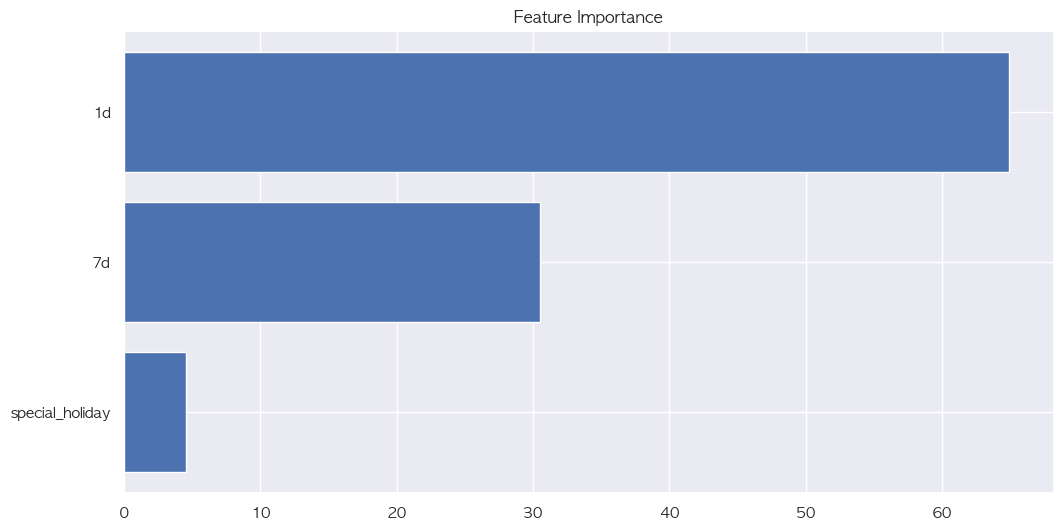

In [42]:
feature_importance = model_cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_train.columns)[sorted_idx])
plt.title('Feature Importance')


In [43]:
cb_pred=model_cb.predict(test_set) 
submission = pd.read_csv('sample_submission.csv',sep =',')
submission['count']=cb_pred
print(submission)

        id       count
0        0 39336.44029
1        1 39243.75711
2        2 39147.90664
3        3 38945.73808
4        4 38975.31332
...    ...         ...
1411  1411 36202.25251
1412  1412 36274.26909
1413  1413 36976.25801
1414  1414 37097.81000
1415  1415 39730.00624

[1416 rows x 2 columns]


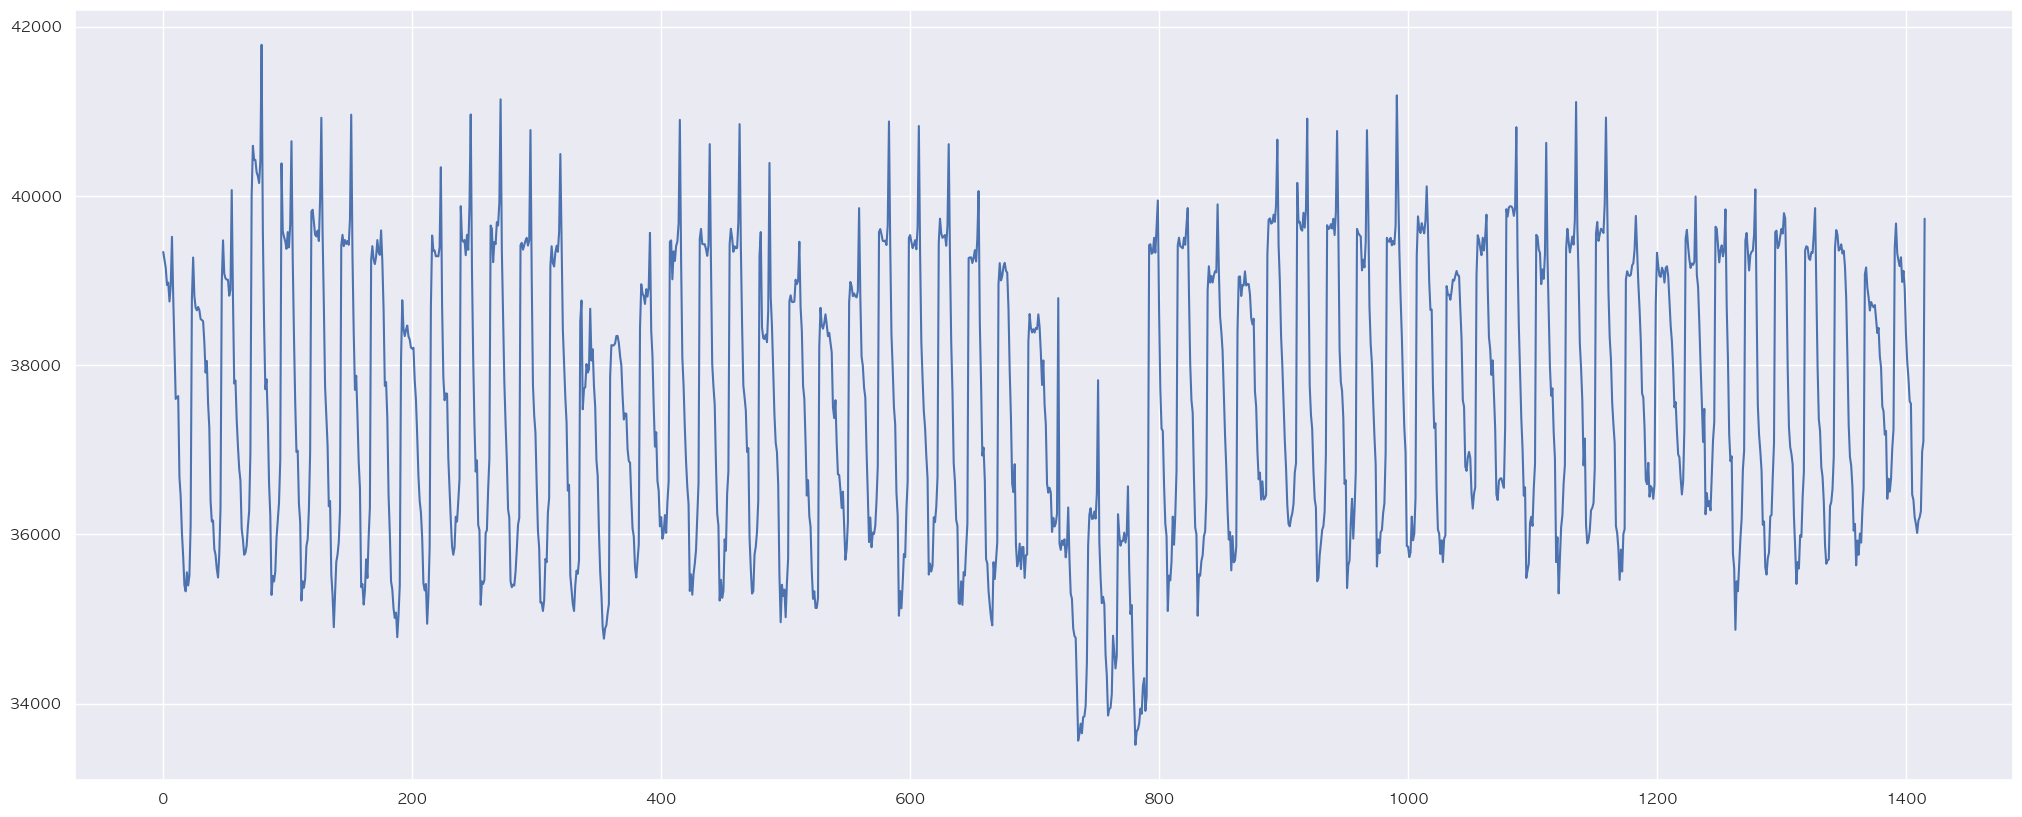

In [44]:
plt.figure(figsize=(25,10))
plt.plot(cb_pred,label = 'pred')
plt.show()

# 학습: Gradient Boosting

In [45]:
X = train.dropna()[['7d','special_holiday','1d']]#,'요일','월','holiday','special_holiday','lunar_new_year'
target = train.dropna()['총생활인구수']
x_train, x_valid, y_train, y_valid = train_test_split(X, target, test_size=0.2, shuffle=False)

In [46]:
'''loss='squared_error', learning_rate=0.03, n_estimators=1000,
              criterion='squared_error', min_samples_split=2, 
              min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
              max_depth=3, min_impurity_decrease=0.0,
              random_state=None, verbose=1, max_leaf_nodes=None'''

"loss='squared_error', learning_rate=0.03, n_estimators=1000,\n              criterion='squared_error', min_samples_split=2, \n              min_samples_leaf=1, min_weight_fraction_leaf=0.0, \n              max_depth=3, min_impurity_decrease=0.0,\n              random_state=None, verbose=1, max_leaf_nodes=None"

In [47]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

model_gbr = GBR(loss='squared_error', learning_rate=0.01, n_estimators=1000,
              criterion='squared_error', min_samples_split=2, 
              min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
              max_depth=4, min_impurity_decrease=0.0,
              random_state=None, verbose=1, max_leaf_nodes=None)


model_gbr.fit(X, target)
gbr_pred = model_gbr.predict(x_valid)

print('GradientBoostingRegressor')
print("Root Mean Squared Error : {0:.5f}".format(math.sqrt(mse(y_valid,gbr_pred))))

      Iter       Train Loss   Remaining Time 
         1    13557901.0724           26.47s
         2    13324771.5314           25.76s
         3    13096434.4648           25.37s
         4    12872514.6977           25.19s
         5    12652878.6621           25.17s
         6    12437773.7383           25.10s
         7    12226925.7553           25.09s
         8    12019737.6437           24.93s
         9    11816738.5935           24.97s
        10    11617605.5797           25.02s
        20     9827272.2444           24.50s
        30     8356386.2363           24.31s
        40     7145779.7339           24.04s
        50     6149603.6676           23.79s
        60     5326719.0479           23.52s
        70     4647691.6919           23.24s
        80     4086835.3340           23.01s
        90     3622820.2119           22.73s
       100     3239655.3533           22.51s
       200     1659149.9322           19.86s
       300     1385719.7289           17.37s
       40

# 학습: Linear regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

In [71]:
model_lr = LinearRegression()
model_lr.fit(X, target)
pred_lr = model_lr.predict(x_valid)

print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(y_valid,pred_lr)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(y_valid,pred_lr))))

pred_lr = model_lr.predict(test[['7d','special_holiday','1d']])

LinearRegression
Mean Squared Error : 606042.67544
Root Mean Squared Error : 778.48743


# 학습: Random Forest

In [72]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import RandomForestRegressor as RFR

model_rf = RFR()
model_rf.fit(X,target)

pred_rf = model_rf.predict(x_valid)

print('RandomForestRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(y_valid,pred_rf)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(y_valid,pred_rf))))
pred_rf = model_rf.predict(test[['7d','special_holiday','1d']])

RandomForestRegressor
Mean Squared Error : 99370.80107
Root Mean Squared Error : 315.23135


# 학습: XGboost

In [73]:
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

model_xgb.fit(X,target)

pred_xgb = model_xgb.predict(x_valid)

print('RandomForestRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(y_valid,pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(y_valid,pred_xgb))))

pred_xgb = model_xgb.predict(test[['7d','special_holiday','1d']])

RandomForestRegressor
Mean Squared Error : 515382.16264
Root Mean Squared Error : 717.90122


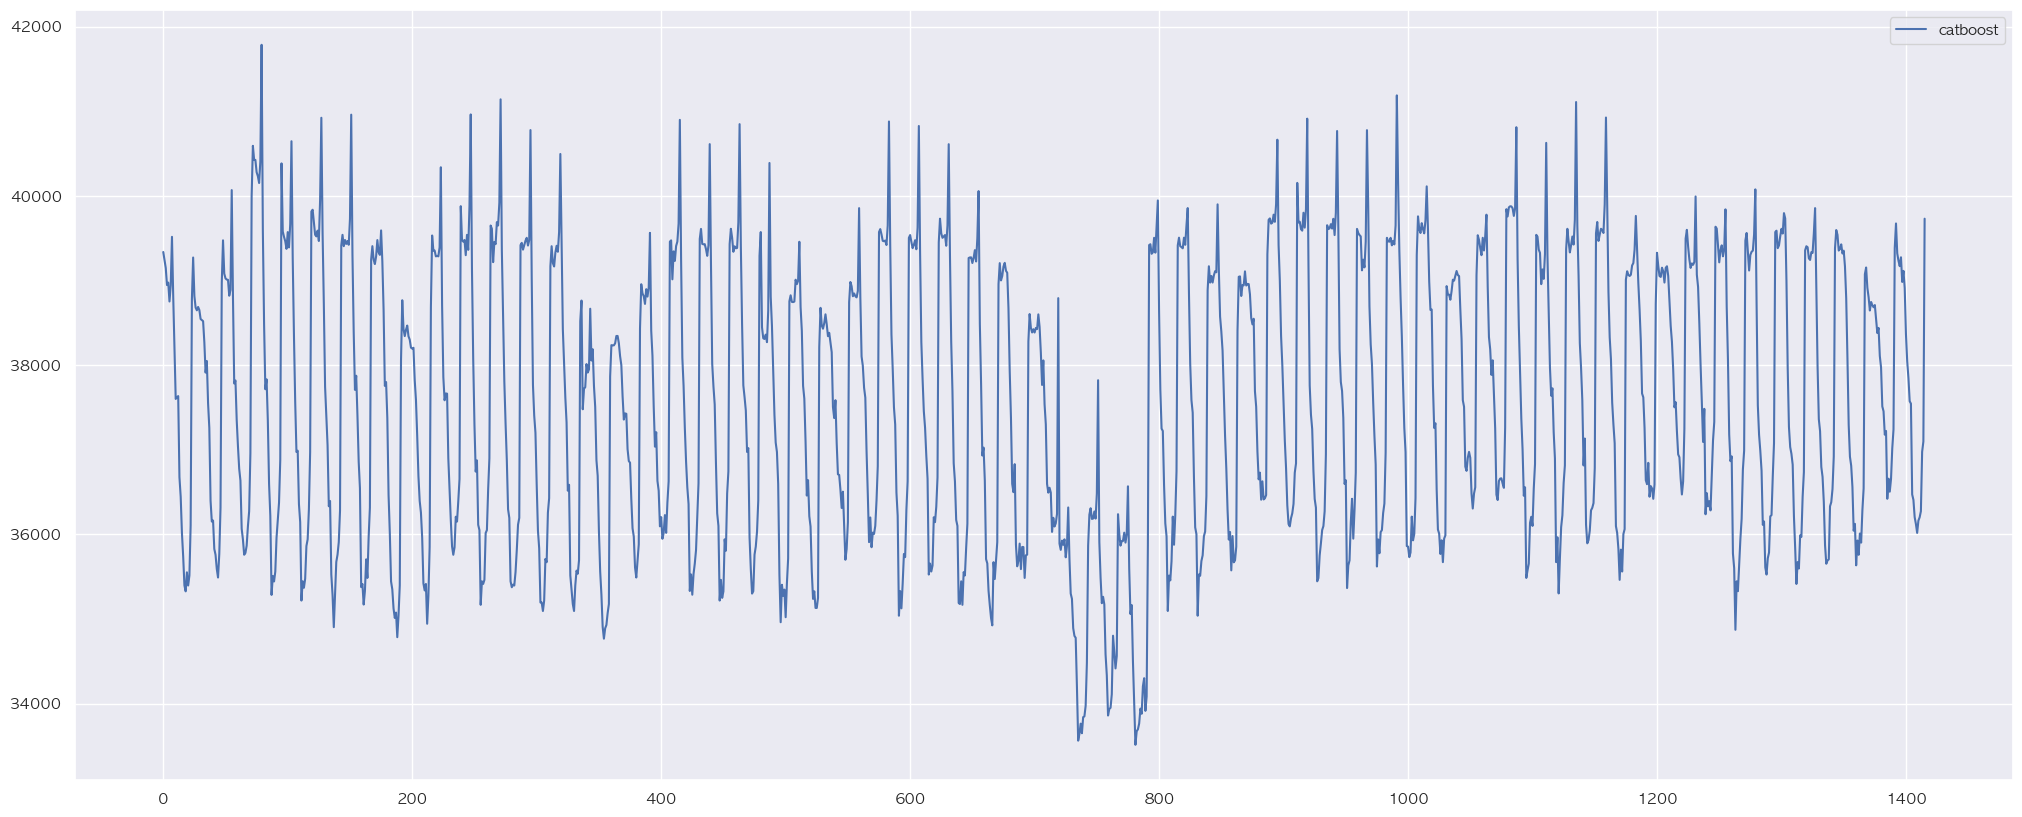

In [74]:
plt.figure(figsize=(25,10))
plt.plot(cb_pred,label = 'catboost')
#plt.plot(pred_xgb,label = 'xgboost')
#plt.plot(pred_rf,label = 'random forest')
#plt.plot(pred_lr,label = 'linear regression')
plt.legend()
plt.show()

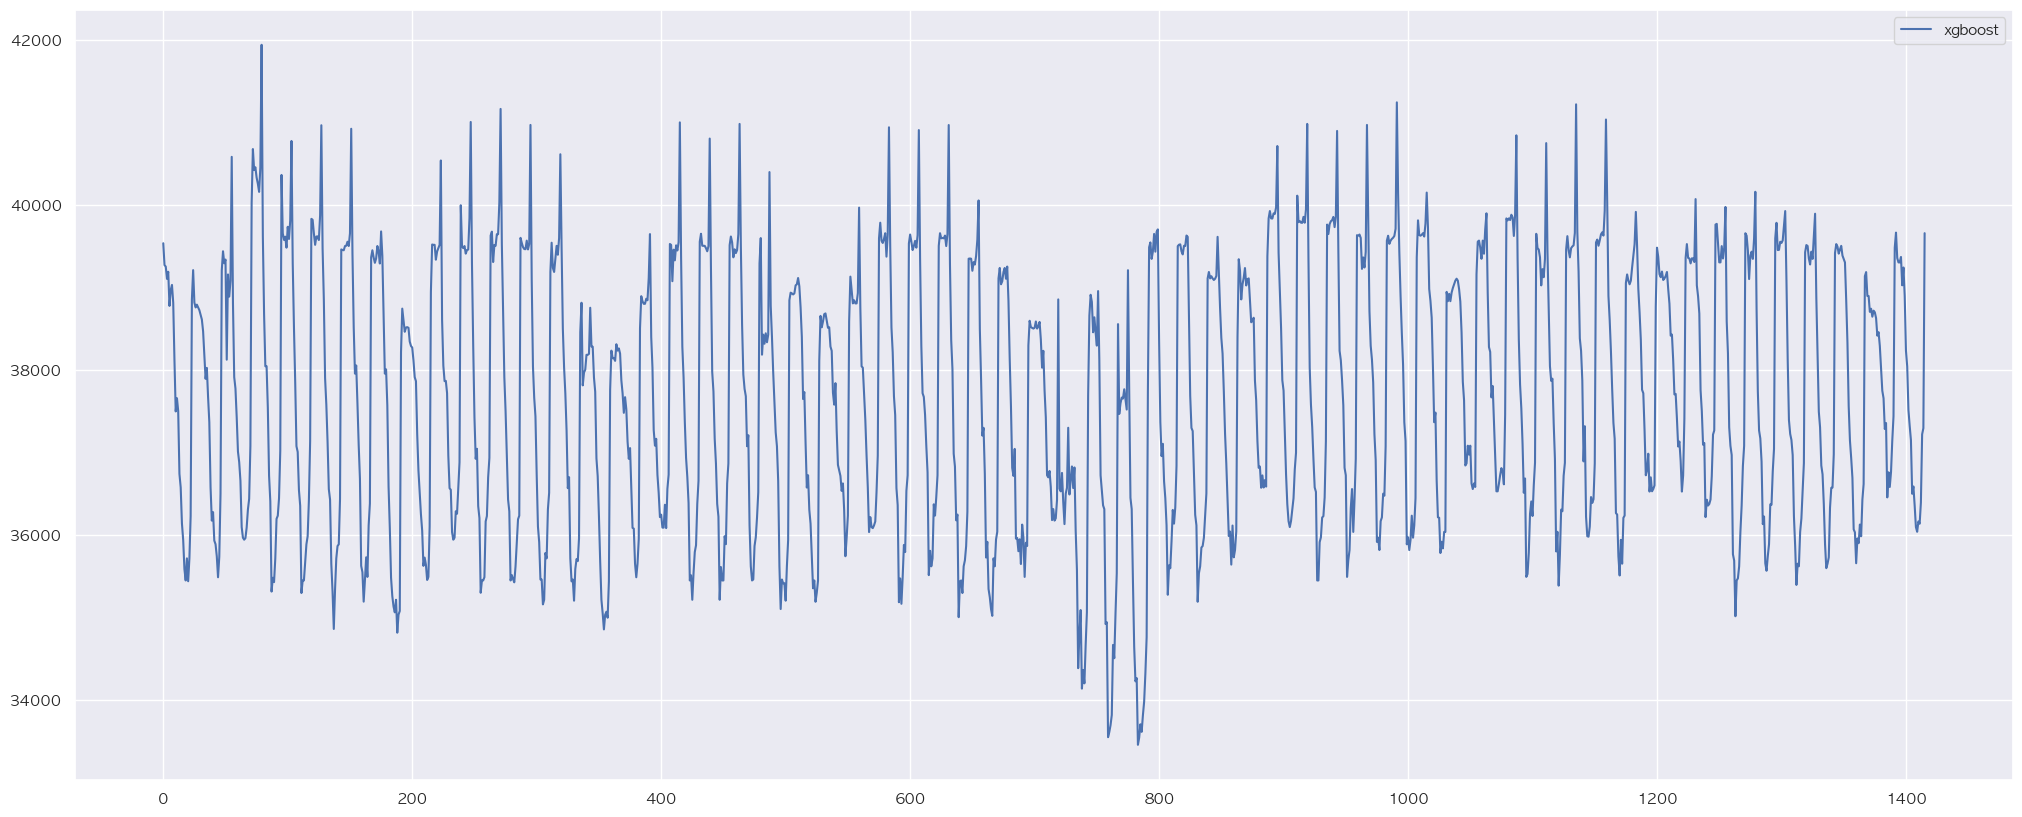

In [75]:
plt.figure(figsize=(25,10))
#plt.plot(cb_pred,label = 'catboost')
plt.plot(pred_xgb,label = 'xgboost')
#plt.plot(pred_rf,label = 'random forest')
#plt.plot(pred_lr,label = 'linear regression')
plt.legend()
plt.show()

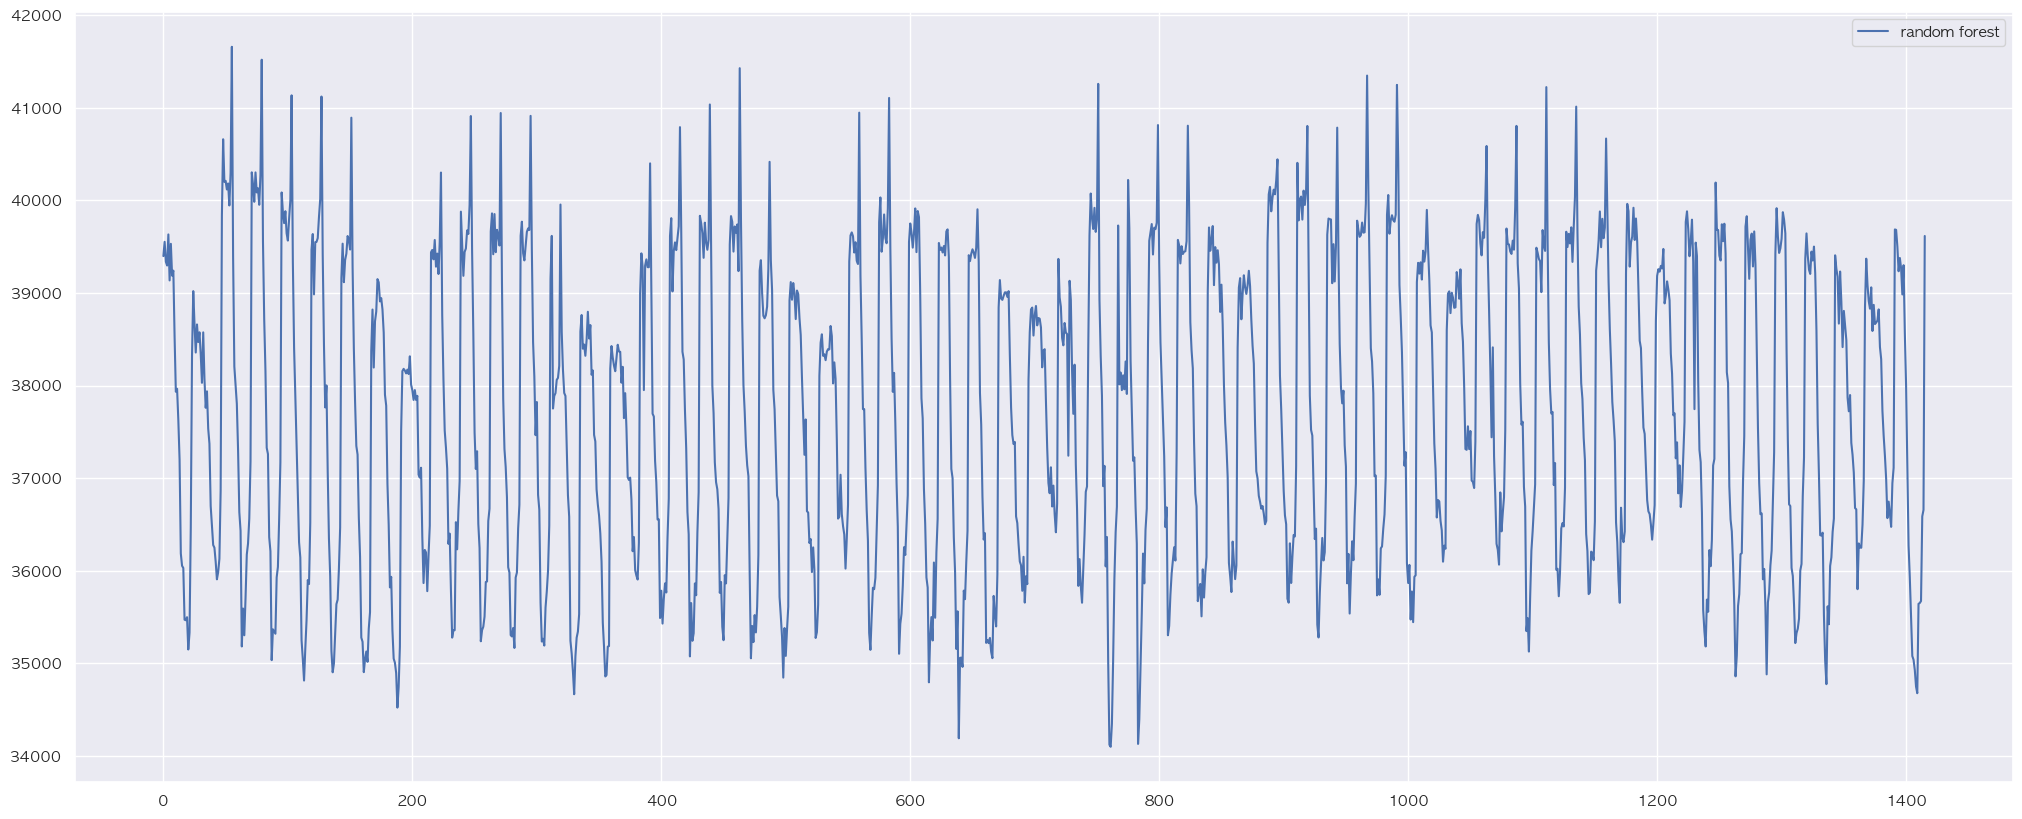

In [76]:
plt.figure(figsize=(25,10))
#plt.plot(cb_pred,label = 'catboost')
#plt.plot(pred_xgb,label = 'xgboost')
plt.plot(pred_rf,label = 'random forest')
#plt.plot(pred_lr,label = 'linear regression')
plt.legend()
plt.show()

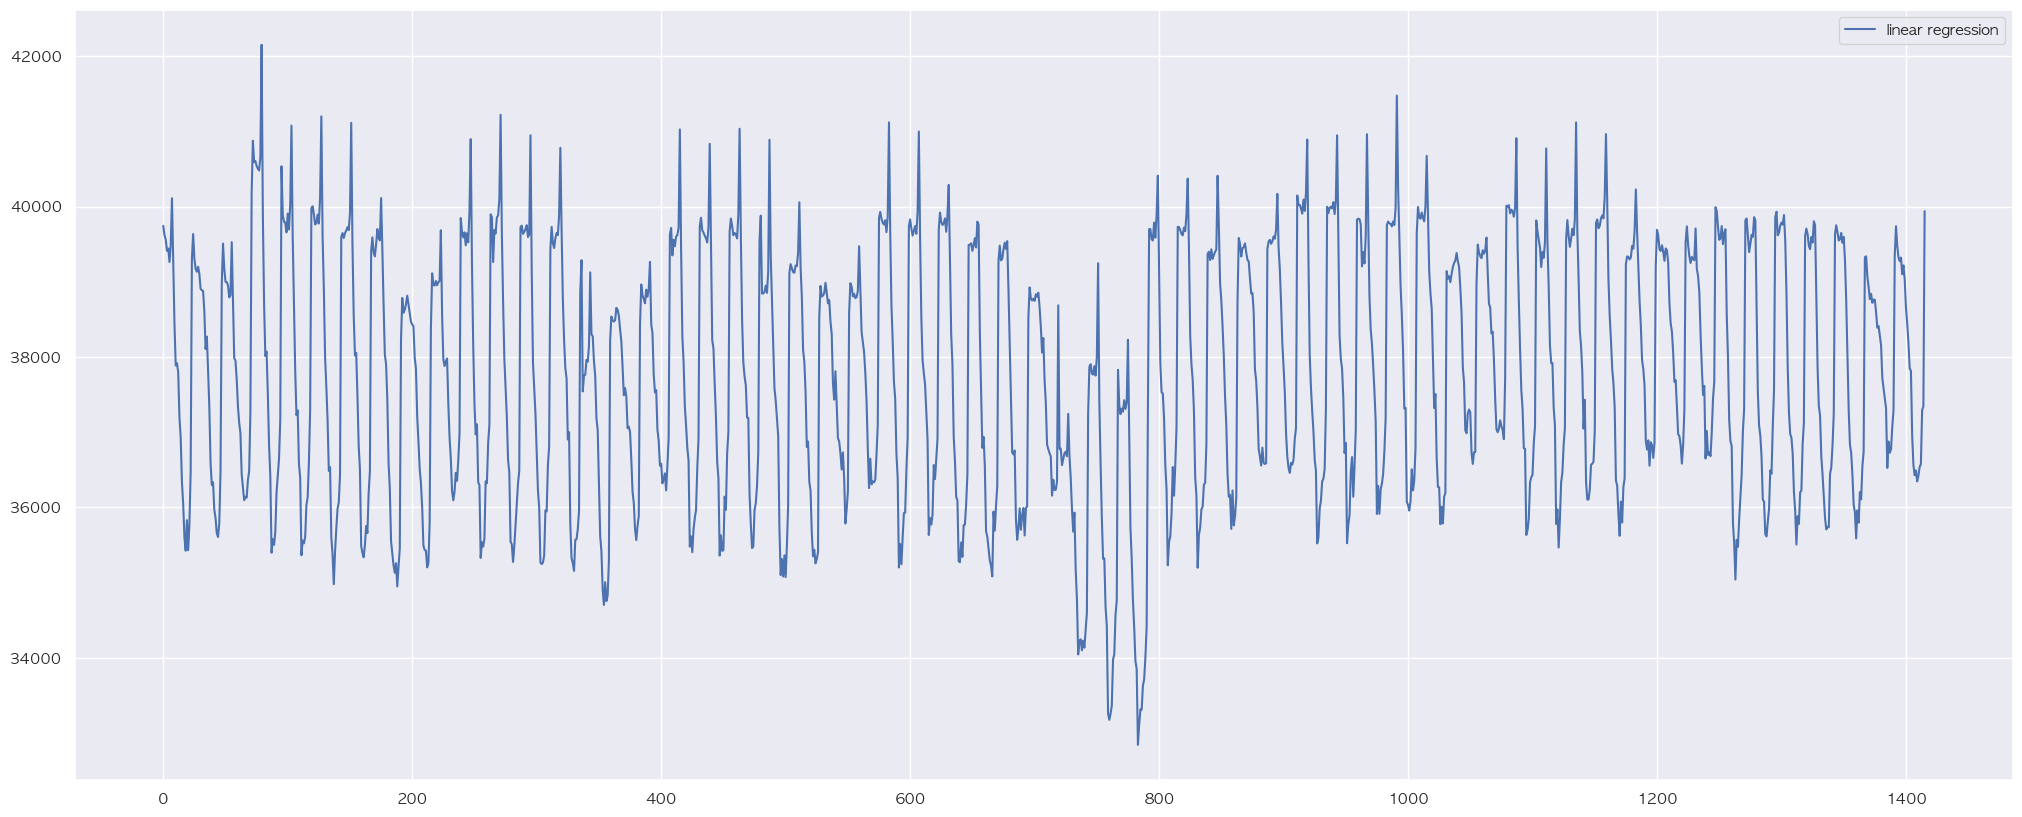

In [77]:
plt.figure(figsize=(25,10))
#plt.plot(cb_pred,label = 'catboost')
#plt.plot(pred_xgb,label = 'xgboost')
#plt.plot(pred_rf,label = 'random forest')
plt.plot(pred_lr,label = 'linear regression')
plt.legend()
plt.show()

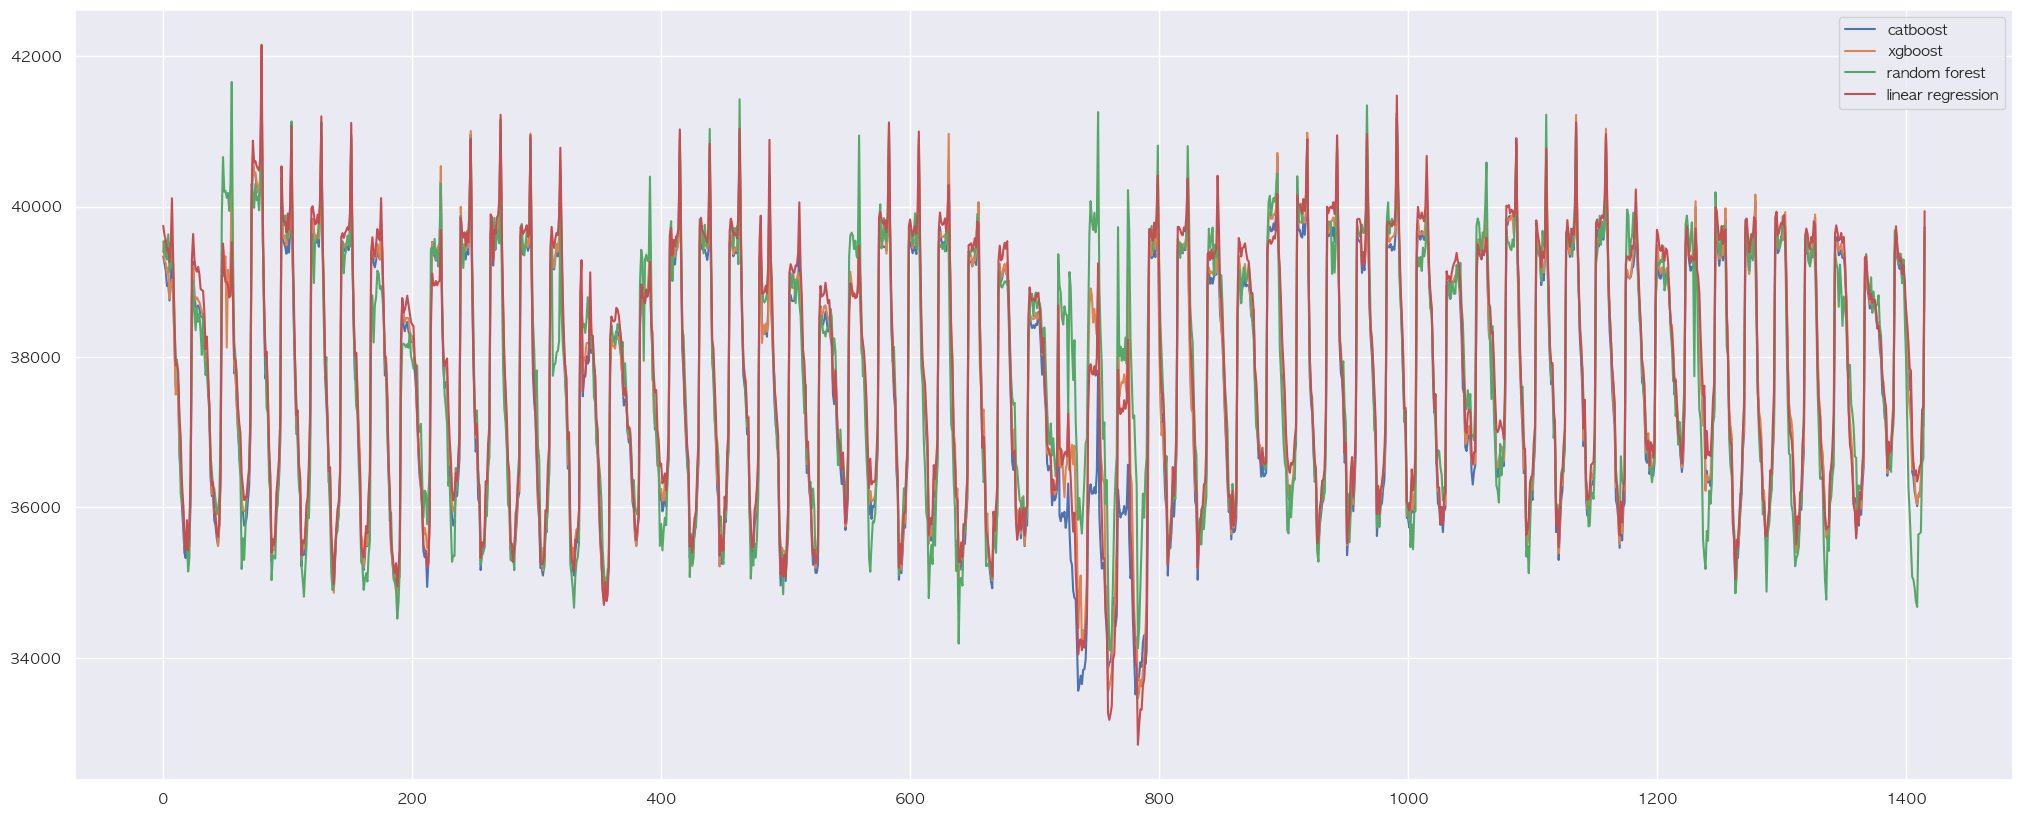

In [78]:
plt.figure(figsize=(25,10))
plt.plot(cb_pred,label = 'catboost')
plt.plot(pred_xgb,label = 'xgboost')
plt.plot(pred_rf,label = 'random forest')
plt.plot(pred_lr,label = 'linear regression')
plt.legend()
plt.show()

# Stacking

In [52]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold

In [53]:
n_folds = 12
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, target, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [54]:
from mlxtend.regressor import StackingCVRegressor

In [55]:
stack = StackingCVRegressor(regressors=(model_cb, model_xgb, 
                                        model_lr, model_rf),
                                meta_regressor=cb,
                                use_features_in_secondary=True,
                                n_jobs=-1)

In [56]:


score = rmsle_cv(stack)
print("stack score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

TypeError: cannot pickle 'module' object

# 노트

#### 11.23.

catboost 가 xgboost보다 좋은듯.

has_time = true, 

catvalue = 시간대, 요일, 휴일, 월, 년도

depth = 3

leaf = 0.2

learning rate = 0.03

one_hot_max_size = 1

만 하는게 성능이 제일 좋은 것 같음


### 12.04.

1, 2월엔 이상하게 금요일에 사람이 적음.

연령대별로 금요일에 사람이 많은 연령이 어딘지 확인할 것.

구정을 따로 추가해줘야할까?

다른 feature는 빼주고 1d, 7d를 shifting 한 것 만 학습한게 성능이 좋음.

### 12.05.

ARIMA의 경우 AIC 스코어가 굉장히 높게 나와서 가용할 수 없을 것 같음.

구정만 따로 추가하는 것이 아닌 대표적인 명절인 추석과 설날을 special_holiday로 따로 분류하니 성능이 좋아졌음.

이유는 알 수 없으나 시간대구분을 빼는 것이 성능이 미세하게 더 좋음.

이유는 알 수 없으나 '총생활인구수'를 float => int 로 바꾸니 성능이 미세하게 더 좋아짐.




이상치와 결측치를 확인할 것.

모델 스태킹 또한 해볼 것.